<a href="https://colab.research.google.com/github/Anthony-Lupo/I8tKopvkvxUYvDst/blob/main/I8tKopvkvxUYvDst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from seaborn import heatmap
from sklearn import set_config

set_config(display ='diagram')

In [52]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Projects with Apziva/ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [53]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [54]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

There is no missing data

In [55]:
# Check for an duplicates
df.duplicated().any()

True

Since the data is ratings that are 1-5, there is a large possibility of duplicated lines of data. Therefore, I will not drop the duplicates.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [57]:
# Let's take a look at any outliers if possible
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Nothing looks out of order. Let's visualize it just to make sure

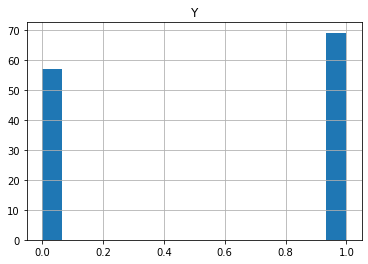

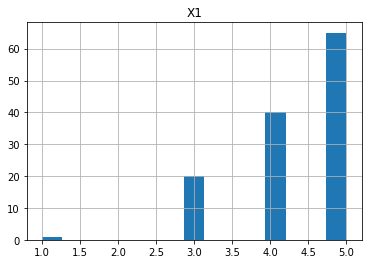

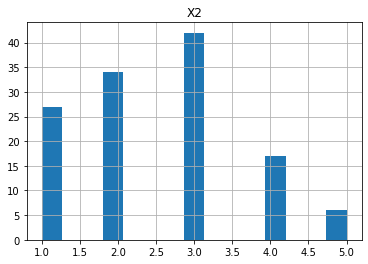

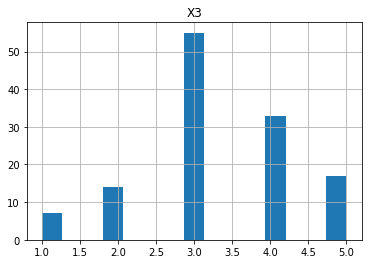

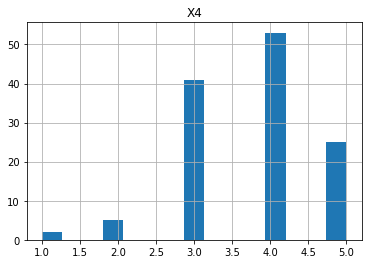

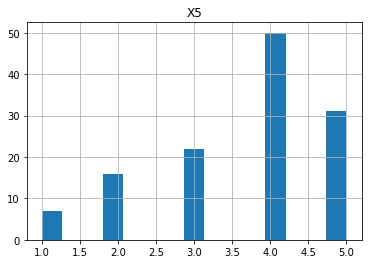

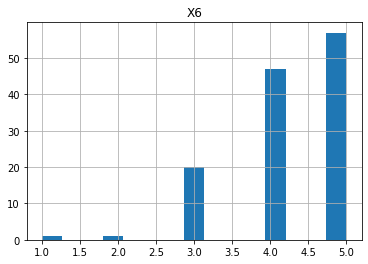

In [58]:
number_columns = df.select_dtypes('number').columns

for col in number_columns:
  df.hist(column = col, bins = 15)
  plt.show()

From these H?istograms, we can see that the majority of customers feel that the app makes ordering easier, they are satisfied with their courier, they pay a good price for their order and the majority of customers in the survey had their order delivered on time. There were a lot of customers negatively reporting that the contents of their orders were not as expected.

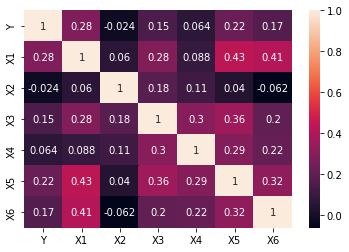

In [59]:
# Let's make a heatmap to explore any relationships within the data
corr = df.corr()
sns.heatmap(corr, annot = True);

In [102]:
# Create the target and split the data
X = df.drop(columns = ['Y'], axis = 1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify= y)

In [103]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      126 non-null    int64
 1   X2      126 non-null    int64
 2   X3      126 non-null    int64
 3   X4      126 non-null    int64
 4   X5      126 non-null    int64
 5   X6      126 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [104]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64


In [85]:
# Instantiate and fit/transform the standard scaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(X)

In [86]:
# Instantiate pc and fit the scaled data
pca = PCA()
pca.fit(scaled_df)

PCA()

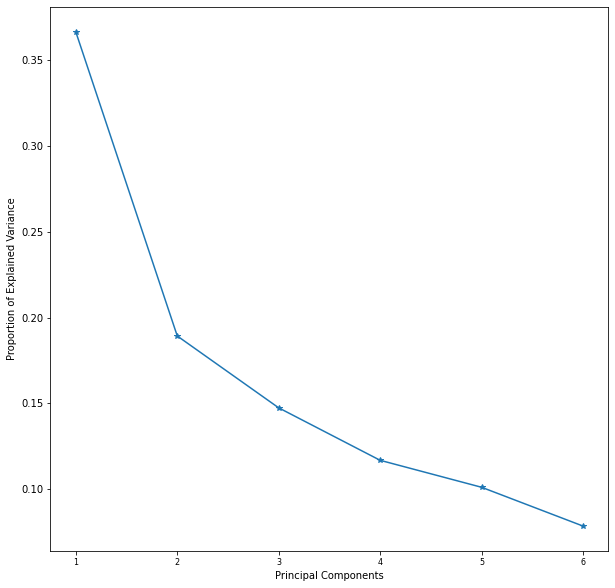

In [87]:
from IPython.core.pylabtools import figsize
# Plot the explained variance ratios of the first 784 components
plt.figure(figsize = (10,10))
plt.plot(range(1,7), pca.explained_variance_ratio_, marker = '*')
plt.xticks(ticks = range(1, 7), fontsize = 8)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Explained Variance');

We can see the elbow of the plot is around 2 PCA components

In [88]:
# Create a PCA model with 2 components
pca2 = PCA(n_components=2)

# Make a preprocessor pipeline
preprocessor = make_pipeline(scaler, pca2)

In [89]:
print('Before PCA Shape: ', X_train.shape)
print('After PCA Shape: ', preprocessor.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - preprocessor.fit_transform(X_train).shape[1])
print('Retained Variance ', pca2.explained_variance_ratio_.sum())

Before PCA Shape:  (94, 6)
After PCA Shape:  (94, 2)
Column count reduced by:  4
Retained Variance  0.5314672304451329


The retained variance is a bit too low at 53% so I am going to use 85% by just choosing the PCA percentage

In [90]:
# Create PCA with 85% Explained Variance
pca85 = PCA(n_components = .85)

# Turn it into a transformer / preprocessor
transformer = make_pipeline(scaler, pca85)

In [91]:
print('Before PCA Shape: ', X_train.shape)
print('After PCA Shape: ', transformer.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - transformer.fit_transform(X_train).shape[1])
print('Retained Variance ', pca85.explained_variance_ratio_.sum())

Before PCA Shape:  (94, 6)
After PCA Shape:  (94, 5)
Column count reduced by:  1
Retained Variance  0.9172171331375559


The retained variance reduced by 1 retains 91%

In [108]:
# Instantiate the logistic Regression Model
logreg = LogisticRegression(max_iter = 900)

# Create a pipeline for the model with the PCA85
log_pipe = make_pipeline(transformer, logreg)

In [109]:
# Fit the Log Reg pipelines to the training data
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.85))])),
                ('logisticregression', LogisticRegression(max_iter=900))])

In [110]:
# 85% Explained variance
print('---'*10)
print('  85% Explained Variance')
print('---'*10)
print('Training Accuracy', log_pipe.score(X_train, y_train))
print('Testing Accuracy', log_pipe.score(X_test, y_test))

------------------------------
  85% Explained Variance
------------------------------
Training Accuracy 0.5851063829787234
Testing Accuracy 0.6875


The testing acurracy is 68.75% so I will have use a Neural Network to see if it performs better

In [111]:
# Deep Learning Imports
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers

In [112]:
# Fit & Transform the X_train to the Transformer
X_train = transformer.fit_transform(X_train)

# Fit the X_test data to the Transformer
X_test = transformer.transform(X_test)

In [113]:
# Define the network structure and save the number of features as input_shape
input_shape = X_train.shape[1]
print('The number of input features in the first layer will be:', input_shape,'inputs.')

The number of input features in the first layer will be: 5 inputs.


In [114]:
# Define the base layer as sequential
satisfaction_model1 = Sequential()

# Create a hidden layer
satisfaction_model1.add(Dense(10, input_dim = input_shape, activation = 'relu'))

# Create an Output layer
satisfaction_model1.add(Dense(1, activation = 'sigmoid'))

In [119]:
from keras.metrics import accuracy
# Step 2: Compile
satisfaction_model1.compile(loss = 'bce', optimizer= 'adam', metrics = 'accuracy')

In [126]:
# Step 3: Fit Our Model
history = satisfaction_model1.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 200)

Epoch 1/200
3/3 [==============================] - 1s 29ms/step - loss: 0.6481 - accuracy: 0.6489 - val_loss: 0.6224 - val_accuracy: 0.6875
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.6477 - accuracy: 0.6489 - val_loss: 0.6224 - val_accuracy: 0.6875
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6471 - accuracy: 0.6489 - val_loss: 0.6221 - val_accuracy: 0.6875
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 0.6466 - accuracy: 0.6489 - val_loss: 0.6218 - val_accuracy: 0.6875
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.6462 - accuracy: 0.6489 - val_loss: 0.6216 - val_accuracy: 0.6875
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6457 - accuracy: 0.6596 - val_loss: 0.6214 - val_accuracy: 0.6875
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6453 - accuracy: 0.6596 - val_loss: 0.6210 - val_accuracy: 0.6875
Epoch 8/200
3/3 [===

In [124]:
# Create a function to plot the history
def plot_history(history, metric = None):
  """plot loss and passed metric. metric is passed as string and must match 'metric' argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = 'Training Loss')
  axes[0].plot(history.history['val_loss'], label = 'Testing Loss')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'Training Loss')
    axes[1].plot(history.history['val_' + metric], label = 'Testing Loss')
    axes[1].set_title(metric)
    axes[1].legend()
  plt.show()

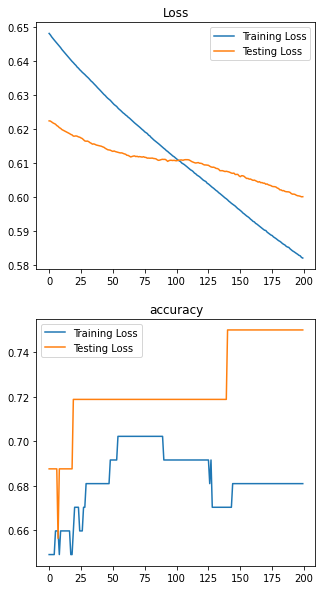

In [127]:
# Plot the histpry of model 1
plot_history(history, 'accuracy')

The model is overfitting, so I am going to add some dropout

In [128]:
# Define the base layer as sequential
satisfaction_model2 = Sequential()

# Create a hidden layer
satisfaction_model2.add(Dense(10, input_dim = input_shape, activation = 'relu'))

# Add 20% Dropout
satisfaction_model2.add(Dropout(0.2))

# Create an Output layer
satisfaction_model2.add(Dense(1, activation = 'sigmoid'))

In [129]:
from keras.metrics import accuracy
# Step 2: Compile
satisfaction_model2.compile(loss = 'bce', optimizer= 'adam', metrics = 'accuracy')

In [130]:
# Step 3: Fit Our Model
history2 = satisfaction_model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 200)

Epoch 1/200
3/3 [==============================] - 3s 288ms/step - loss: 0.8288 - accuracy: 0.3936 - val_loss: 0.7744 - val_accuracy: 0.4375
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.8064 - accuracy: 0.4043 - val_loss: 0.7702 - val_accuracy: 0.4375
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 0.8140 - accuracy: 0.4149 - val_loss: 0.7656 - val_accuracy: 0.4375
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.7424 - accuracy: 0.4255 - val_loss: 0.7613 - val_accuracy: 0.4688
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.8116 - accuracy: 0.4468 - val_loss: 0.7568 - val_accuracy: 0.4688
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 0.7705 - accuracy: 0.4149 - val_loss: 0.7524 - val_accuracy: 0.4688
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.7563 - accuracy: 0.4468 - val_loss: 0.7483 - val_accuracy: 0.4688
Epoch 8/200
3/3 [==

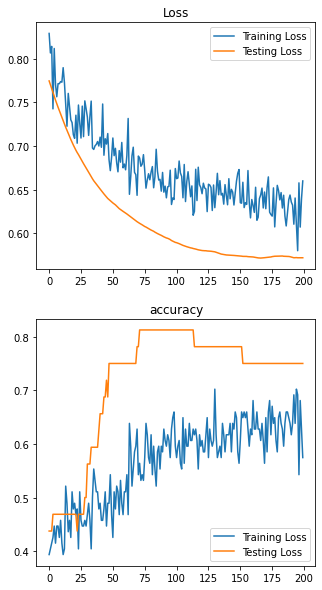

In [131]:
# Plot the histpry of model 1
plot_history(history2, 'accuracy')

In [136]:
# Add a Layer to the model to increase some complexity
# Define the base layer as sequential
satisfaction_model3 = Sequential()

# Create a hidden layer
satisfaction_model3.add(Dense(10, input_dim = input_shape, activation = 'relu'))

# Add 20% Dropout
satisfaction_model3.add(Dropout(0.2))

# Second hidden Layer
satisfaction_model3.add(Dense(10, activation = 'relu'))

# Add 20% Dropout
satisfaction_model3.add(Dropout(0.2))

# Create an Output layer
satisfaction_model3.add(Dense(1, activation = 'sigmoid'))

In [137]:
from keras.metrics import accuracy
# Step 2: Compile
satisfaction_model3.compile(loss = 'bce', optimizer= 'adam', metrics = 'accuracy')

In [138]:
# Step 3: Fit Our Model # Increase epochs to 300
history3 = satisfaction_model3.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 300)

Epoch 1/300
3/3 [==============================] - 2s 179ms/step - loss: 0.7295 - accuracy: 0.5213 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 2/300
3/3 [==============================] - 0s 42ms/step - loss: 0.7579 - accuracy: 0.5213 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 3/300
3/3 [==============================] - 0s 28ms/step - loss: 0.7445 - accuracy: 0.4787 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 4/300
3/3 [==============================] - 0s 60ms/step - loss: 0.7296 - accuracy: 0.5319 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 5/300
3/3 [==============================] - 0s 53ms/step - loss: 0.7190 - accuracy: 0.5213 - val_loss: 0.6963 - val_accuracy: 0.4375
Epoch 6/300
3/3 [==============================] - 0s 30ms/step - loss: 0.7048 - accuracy: 0.4894 - val_loss: 0.6955 - val_accuracy: 0.4375
Epoch 7/300
3/3 [==============================] - 0s 20ms/step - loss: 0.7586 - accuracy: 0.4149 - val_loss: 0.6947 - val_accuracy: 0.4375
Epoch 8/300
3/3 [==

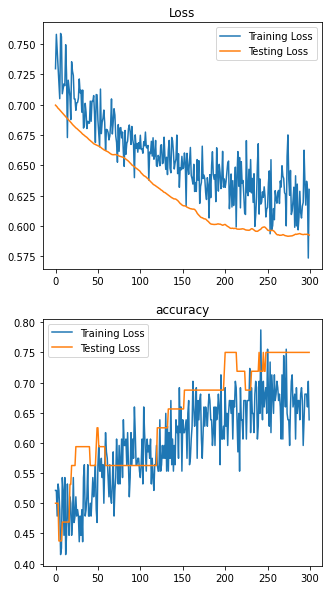

In [139]:
# Plot the hist0ry of model 1
plot_history(history3, 'accuracy')